In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [6]:
#Numeric columns in the dataset

numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [9]:
#Finding mean median mode Standard deviation for the Numerical columns
stats = df[numeric_cols].describe().T[['mean', 'std']] # Changed numerical_cols to numeric_cols
stats['median'] = df[numeric_cols].median() # Changed numerical_cols to numeric_cols
stats['mode'] = df[numeric_cols].mode().iloc[0] # Changed numerical_cols to numeric_cols
print(stats)

                           mean           std       median          mode
Volume                 5.066667      4.231602     4.000000      3.000000
Avg Price          10453.433333  18079.904840  1450.000000    400.000000
Total Sales Value  33812.835556  50535.074173  5700.000000  24300.000000
Discount Rate (%)     15.155242      4.220602    16.577766      5.007822
Discount Amount     3346.499424   4509.902963   988.933733     69.177942
Net Sales Value    30466.336131  46358.656624  4677.788059    326.974801


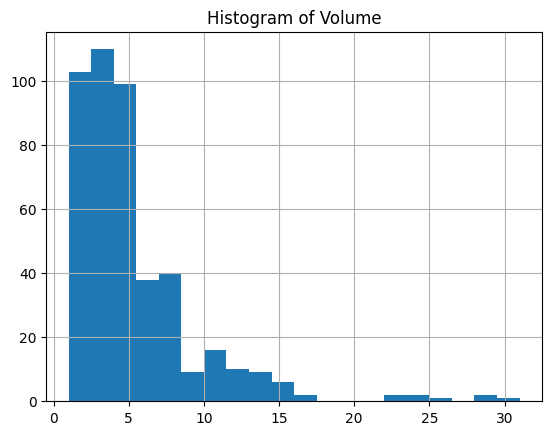

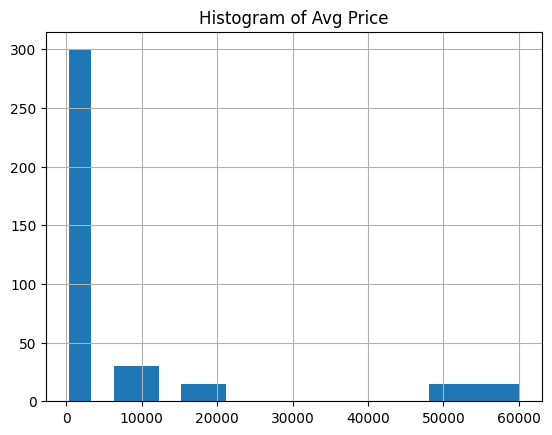

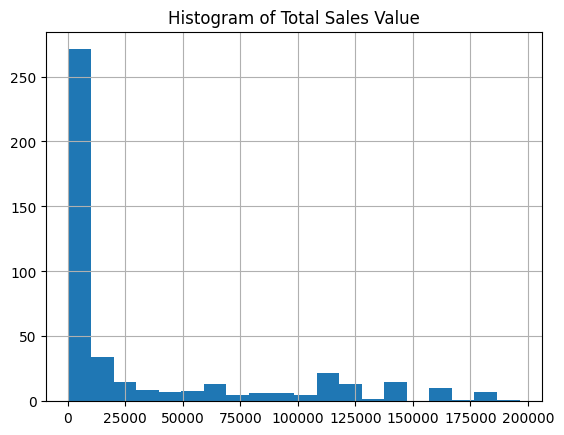

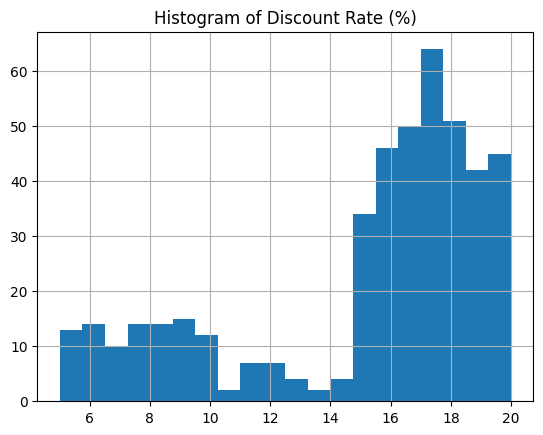

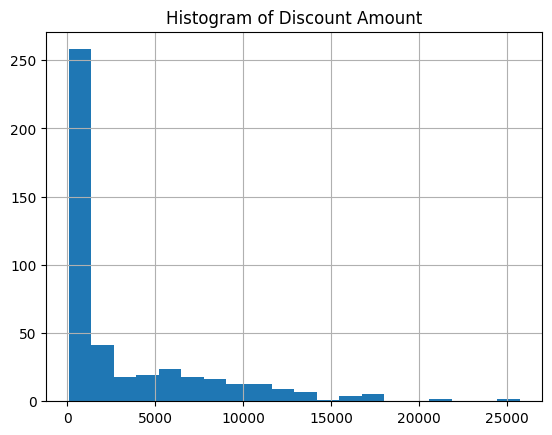

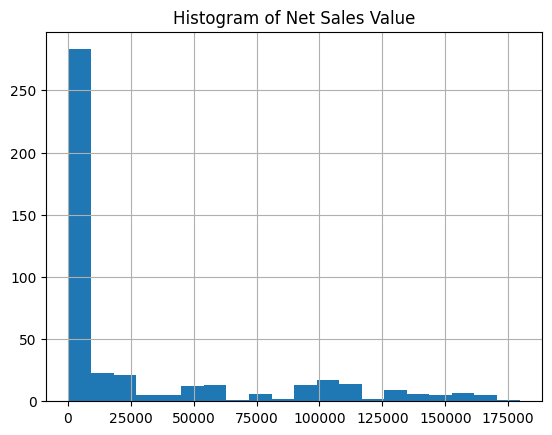

In [12]:
#creating Histogram for the each numerical column
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.show()

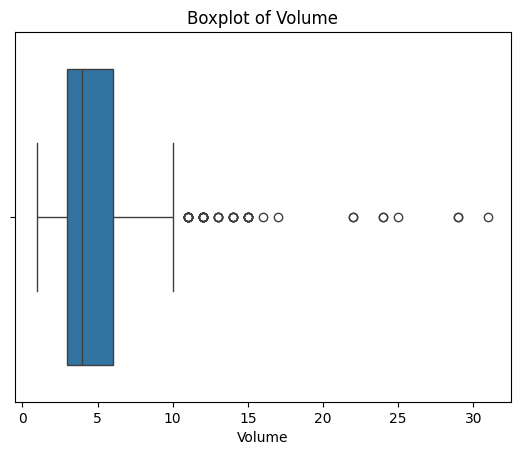

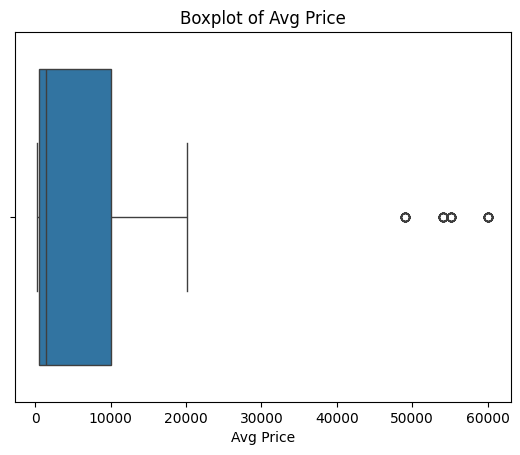

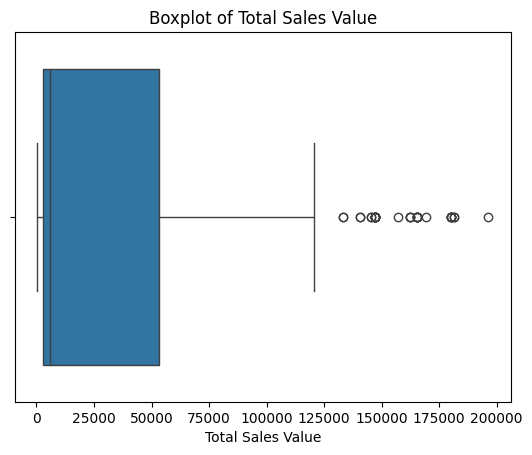

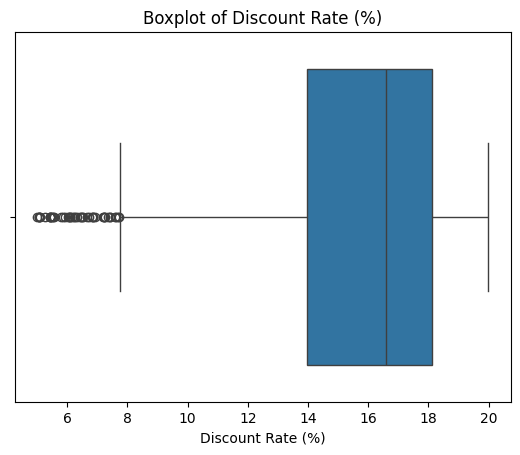

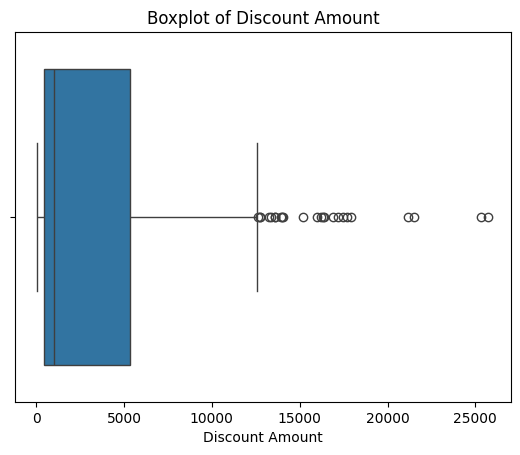

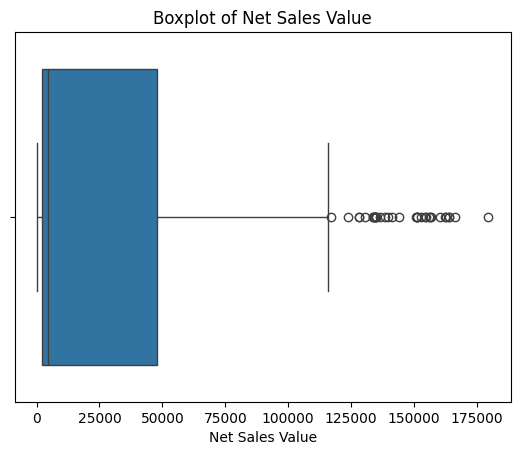

In [13]:
# Boxplots: Identify outliers and observe the spread using seaborn
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

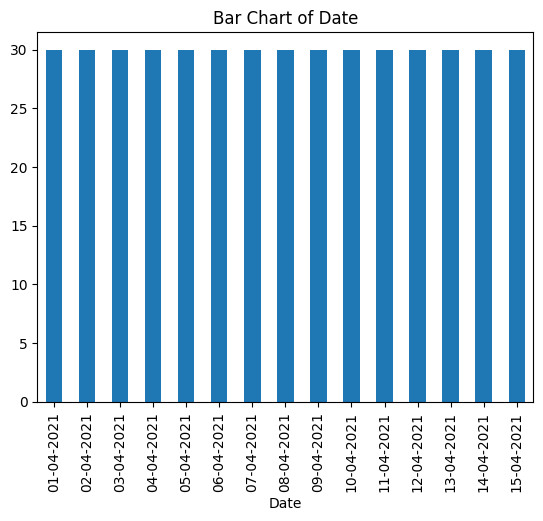

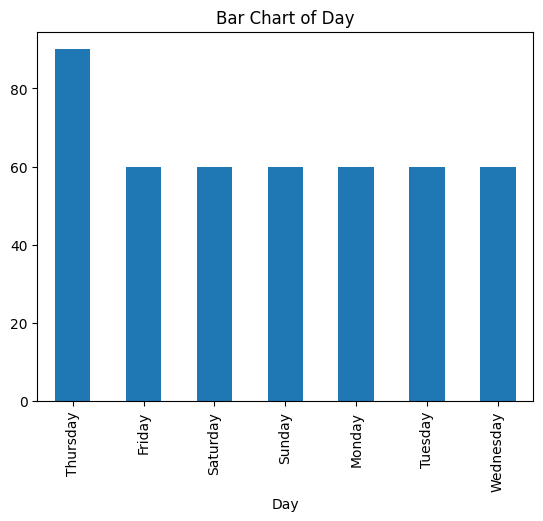

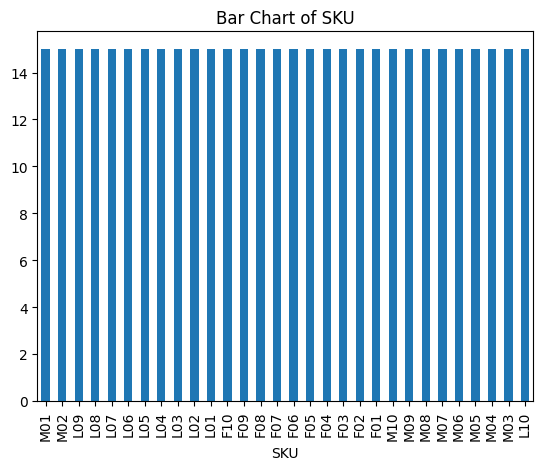

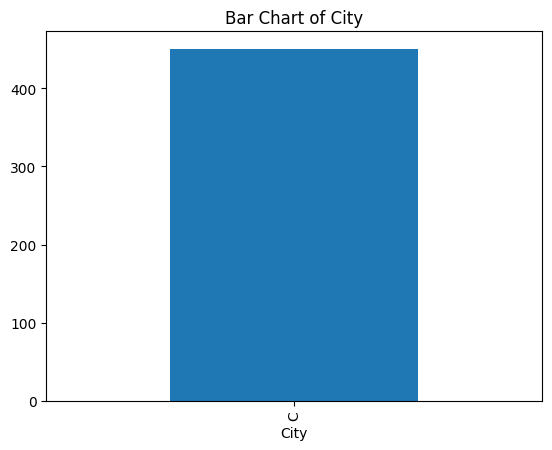

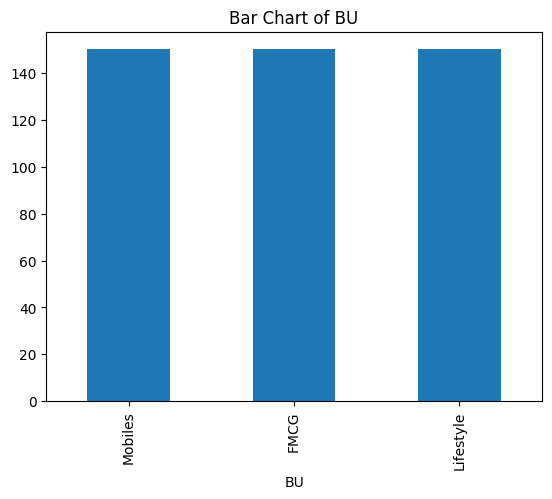

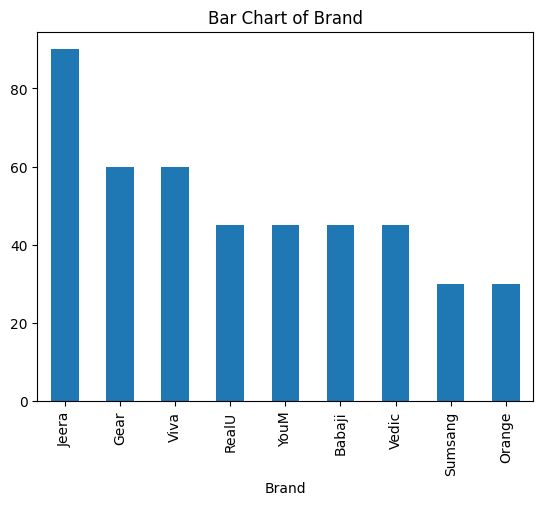

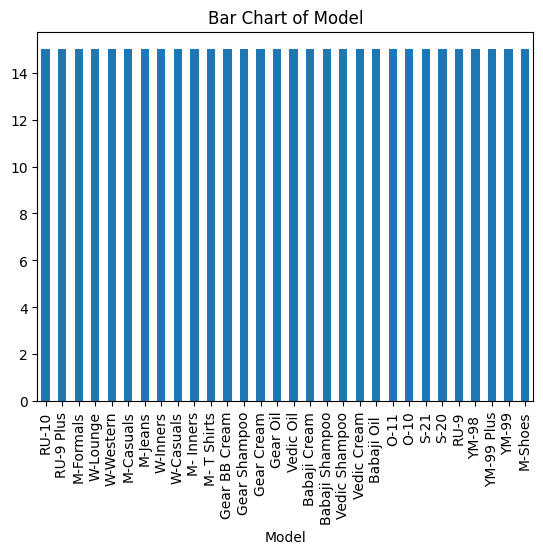

In [14]:
# Bar Charts for Categorical Columns: Plot bar charts for category counts
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.show()


In [15]:
# Step 5: Standardize Numerical Data
#Z-Score Normalization: Use z-score for each numerical column
from scipy.stats import zscore
df[numeric_cols] = df[numeric_cols].apply(zscore)
print(df[numeric_cols].head())  # View standardized values


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [16]:
#Step 6: Convert Categorical Data into Dummy Variables
#One-Hot Encoding: Transform categorical columns to binary (0/1) columns.
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.head())  # View transformed data


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          

In [19]:
# Print descriptive statistics summary
print("Descriptive Statistics for Numeric Data:")
print(df.describe().T)

# Print standardized summary (mean and std)
print("\nStandardization Check (Mean & Std Dev):")
# Calculate and store standardized summary
standardized_summary = df[numeric_cols].agg(['mean', 'std']) # Calculate mean and standard deviation
print(standardized_summary)

# Display the first few rows of the final dataset to check one-hot encoding
print("\nSample of Dataset After Preprocessing:")
print(df.head())

Descriptive Statistics for Numeric Data:
                   count          mean       std       min       25%  \
Volume             450.0  6.118562e-17  1.001113 -0.962092 -0.488932   
Avg Price          450.0  3.157968e-17  1.001113 -0.562765 -0.553075   
Total Sales Value  450.0  1.578984e-17  1.001113 -0.661917 -0.616353   
Discount Rate (%)  450.0 -3.552714e-17  1.001113 -2.406935 -0.282307   
Discount Amount    450.0 -5.526444e-17  1.001113 -0.727503 -0.640646   
Net Sales Value    450.0  1.973730e-17  1.001113 -0.650858 -0.610362   

                        50%       75%       max  
Volume            -0.252352  0.220808  6.135311  
Avg Price         -0.498534 -0.019570  2.749009  
Total Sales Value -0.556923  0.384065  3.220894  
Discount Rate (%)  0.337418  0.701978  1.147360  
Discount Amount   -0.523335  0.437302  4.970494  
Net Sales Value   -0.556902  0.375354  3.218536  

Standardization Check (Mean & Std Dev):
            Volume     Avg Price  Total Sales Value  Discount R